In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("C:\\Users\\sivad\\Documents\\INDU_6611_Assignment_3_codes\\dataset.csv")

# Display the first five rows
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Info:")
print(data.info())

First 5 rows of the dataset:
   Row        Day  Day.Of.Week       Date Page.Loads Unique.Visits  \
0    1     Sunday            1  9/14/2014      2,146         1,582   
1    2     Monday            2  9/15/2014      3,621         2,528   
2    3    Tuesday            3  9/16/2014      3,698         2,630   
3    4  Wednesday            4  9/17/2014      3,667         2,614   
4    5   Thursday            5  9/18/2014      3,316         2,366   

  First.Time.Visits Returning.Visits  Unnamed: 8  
0             1,430              152         NaN  
1             2,297              231         NaN  
2             2,352              278         NaN  
3             2,327              287         NaN  
4             2,130              236         NaN  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Row                216

In [29]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Row                     0
Day                     0
Day.Of.Week             0
Date                    0
Page.Loads              0
Unique.Visits           0
First.Time.Visits       0
Returning.Visits        0
Unnamed: 8           2167
dtype: int64


In [30]:
# Basic statistics of the dataset
print("\nBasic Statistics:")
print(data.describe())


Basic Statistics:
               Row  Day.Of.Week  Unnamed: 8
count  2167.000000  2167.000000         0.0
mean   1084.000000     3.997231         NaN
std     625.703338     2.000229         NaN
min       1.000000     1.000000         NaN
25%     542.500000     2.000000         NaN
50%    1084.000000     4.000000         NaN
75%    1625.500000     6.000000         NaN
max    2167.000000     7.000000         NaN


In [31]:
# Verify that the 'Date' field is in datetime format
print("\nChecking 'Date' field type before conversion:")
print(data['Date'].dtype)

# If 'Date' is not in datetime format, convert it
if not pd.api.types.is_datetime64_any_dtype(data['Date']):
    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
    print("\n'Date' field converted to datetime:")
    print(data['Date'].head())

# Ensure all date conversions are valid
if data['Date'].isnull().any():
    print("\nWarning: Some invalid dates detected. Dropping rows with invalid dates.")
    data = data.dropna(subset=['Date'])

# Sort dataset by 'Date'
data = data.sort_values(by='Date')

# Check the sorting of days (Day, Day.Of.Week)
print("\nUnique values in 'Day' and 'Day.Of.Week' fields:")
print(data['Day'].unique())
print(data['Day.Of.Week'].unique())

# Confirm 'Day.Of.Week' aligns with numerical day order
day_mapping = {
    "Sunday": 1, "Monday": 2, "Tuesday": 3, "Wednesday": 4, 
    "Thursday": 5, "Friday": 6, "Saturday": 7
}

# Verify alignment
data['Day.Mapped'] = data['Day'].map(day_mapping)
if not (data['Day.Mapped'] == data['Day.Of.Week']).all():
    print("\nWarning: 'Day' and 'Day.Of.Week' mappings do not align perfectly.")

data = data.drop(columns=['Day.Mapped'])



Checking 'Date' field type before conversion:
object

'Date' field converted to datetime:
0   2014-09-14
1   2014-09-15
2   2014-09-16
3   2014-09-17
4   2014-09-18
Name: Date, dtype: datetime64[ns]

Unique values in 'Day' and 'Day.Of.Week' fields:
['Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday']
[1 2 3 4 5 6 7]


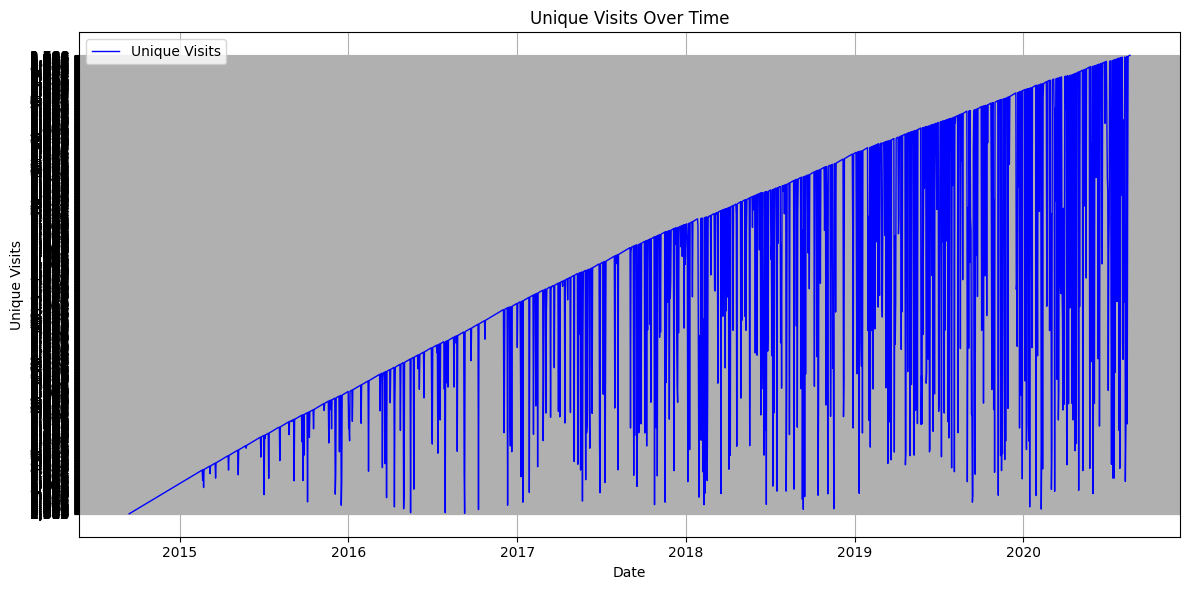

In [32]:
# Plot Unique.Visits over Date
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Unique.Visits'], label='Unique Visits', color='blue', linewidth=1)
plt.title('Unique Visits Over Time')
plt.xlabel('Date')
plt.ylabel('Unique Visits')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure the 'Date' column is set as the index for decomposition
data.set_index('Date', inplace=True)

# Remove commas and convert 'Unique.Visits' to numeric
data['Unique.Visits'] = data['Unique.Visits'].str.replace(',', '').astype(float)

# Decompose the time series
decomposition = seasonal_decompose(data['Unique.Visits'], model='additive', period=365)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

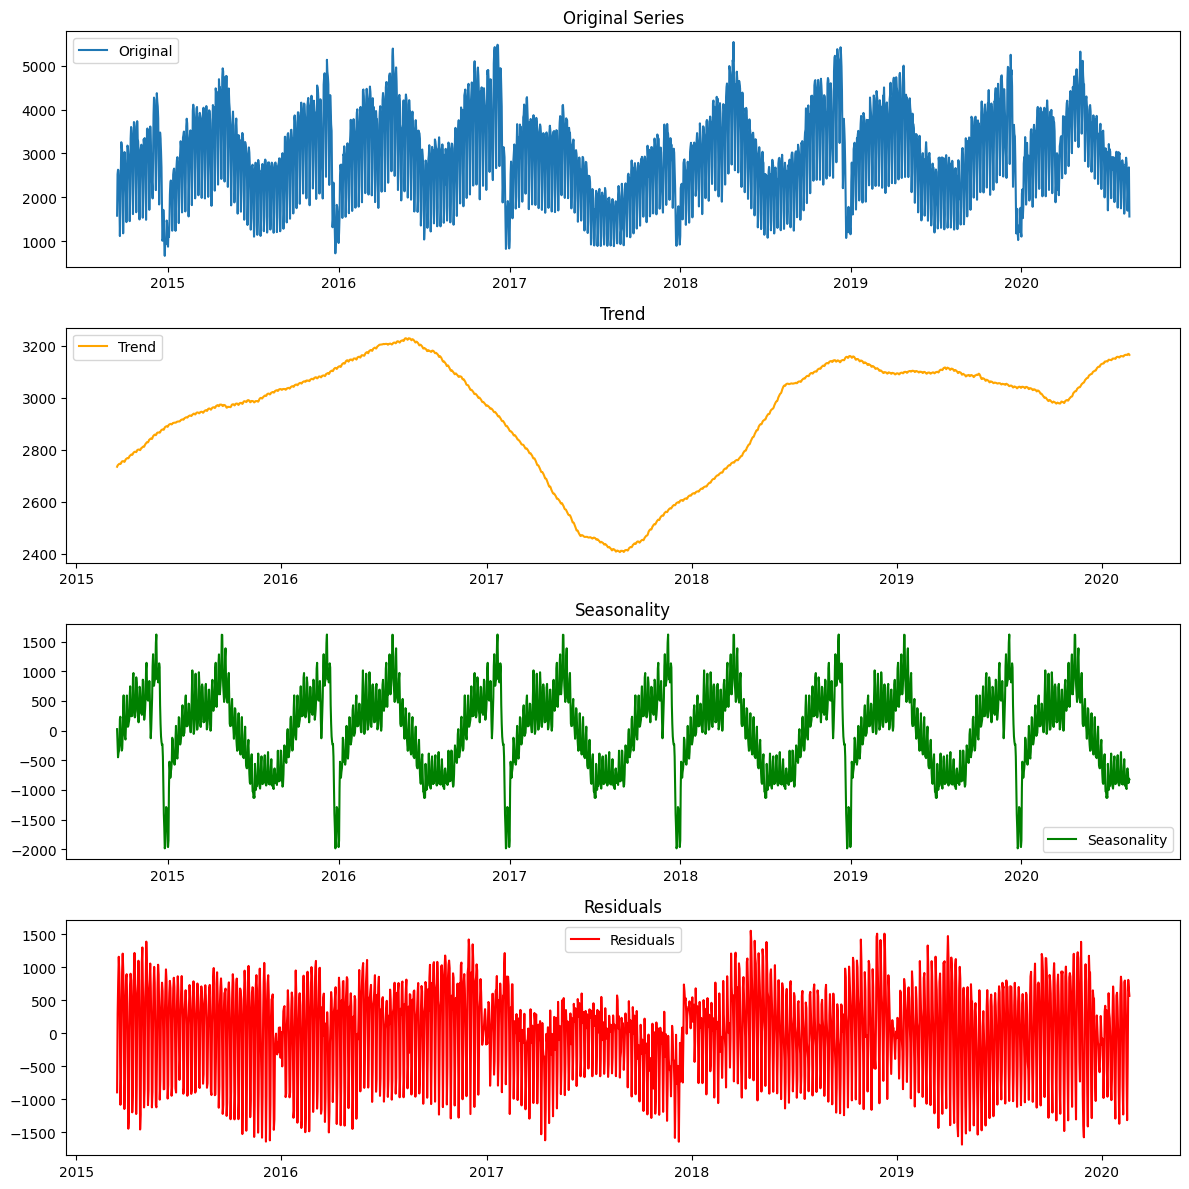

In [34]:
# Plot the decomposition
plt.figure(figsize=(12, 12))

# Original series
plt.subplot(4, 1, 1)
plt.plot(data['Unique.Visits'], label='Original')
plt.title('Original Series')
plt.legend()

# Trend
plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

# Seasonality
plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.legend()

# Residuals
plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals', color='red')
plt.title('Residuals')
plt.legend()

plt.tight_layout()
plt.show()


In [47]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the original 'Unique.Visits' series
result = adfuller(data['Unique.Visits'])

# Extract and print the ADF test results
print("ADF Test Results:")
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value:.4f}")

if result[1] <= 0.05:
    print("\nConclusion: The data is stationary (reject the null hypothesis).")
else:
    print("\nConclusion: The data is not stationary (fail to reject the null hypothesis).")


ADF Test Results:
ADF Statistic: -4.4760
p-value: 0.0002
Critical Values:
   1%: -3.4334
   5%: -2.8629
   10%: -2.5675

Conclusion: The data is stationary (reject the null hypothesis).


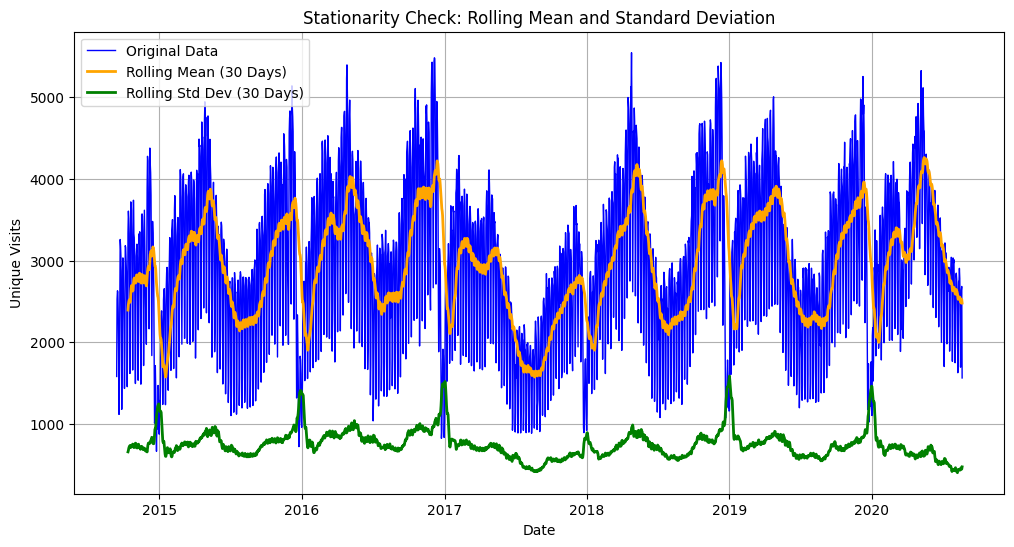

In [36]:
# Calculate the rolling mean and standard deviation
rolling_mean = data['Unique.Visits'].rolling(window=30).mean()
rolling_std = data['Unique.Visits'].rolling(window=30).std()

# Plot the original data, rolling mean, and rolling standard deviation
plt.figure(figsize=(12, 6))
plt.plot(data['Unique.Visits'], label='Original Data', color='blue', linewidth=1)
plt.plot(rolling_mean, label='Rolling Mean (30 Days)', color='orange', linewidth=2)
plt.plot(rolling_std, label='Rolling Std Dev (30 Days)', color='green', linewidth=2)
plt.title('Stationarity Check: Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Unique Visits')
plt.legend(loc='best')
plt.grid()
plt.show()


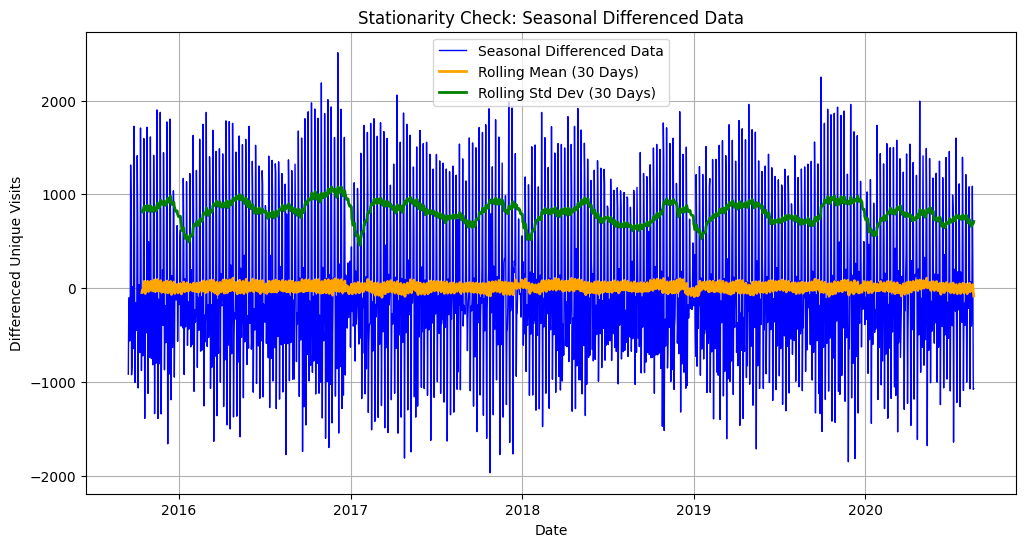

ADF Test Results After Seasonal Differencing:
ADF Statistic: -11.2082
p-value: 0.0000
Critical Values:
   1%: -3.4340
   5%: -2.8632
   10%: -2.5676

Conclusion: The data is stationary (reject the null hypothesis).


In [48]:
# First-order differencing to remove trend
data['First_Difference'] = data['Unique.Visits'].diff()

# Seasonal differencing to remove seasonality
data['Seasonal_Difference'] = data['First_Difference'].diff(365)

# Plot rolling mean and standard deviation after seasonal differencing
rolling_mean = data['Seasonal_Difference'].rolling(window=30).mean()
rolling_std = data['Seasonal_Difference'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(data['Seasonal_Difference'], label='Seasonal Differenced Data', color='blue', linewidth=1)
plt.plot(rolling_mean, label='Rolling Mean (30 Days)', color='orange', linewidth=2)
plt.plot(rolling_std, label='Rolling Std Dev (30 Days)', color='green', linewidth=2)
plt.title('Stationarity Check: Seasonal Differenced Data')
plt.xlabel('Date')
plt.ylabel('Differenced Unique Visits')
plt.legend(loc='best')
plt.grid()
plt.show()

# Re-check stationarity with ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Seasonal_Difference'].dropna())

print("ADF Test Results After Seasonal Differencing:")
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value:.4f}")

if result[1] <= 0.05:
    print("\nConclusion: The data is stationary (reject the null hypothesis).")
else:
    print("\nConclusion: The data is not stationary (fail to reject the null hypothesis).")


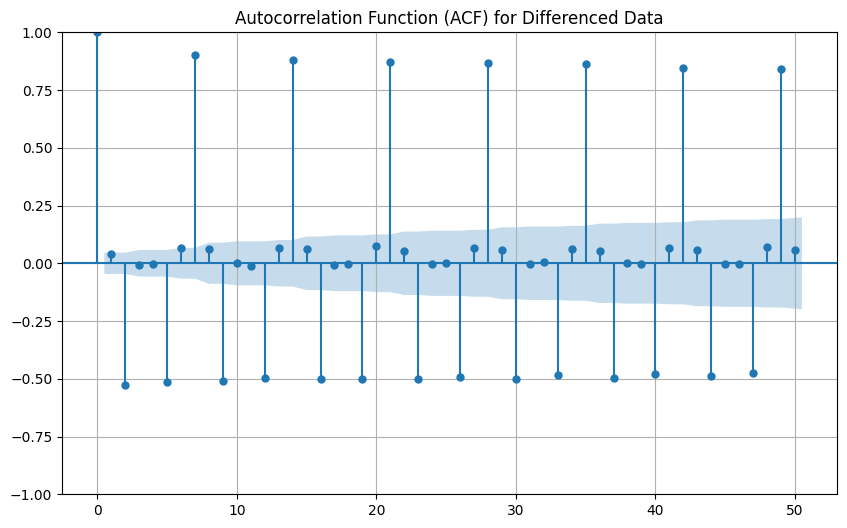

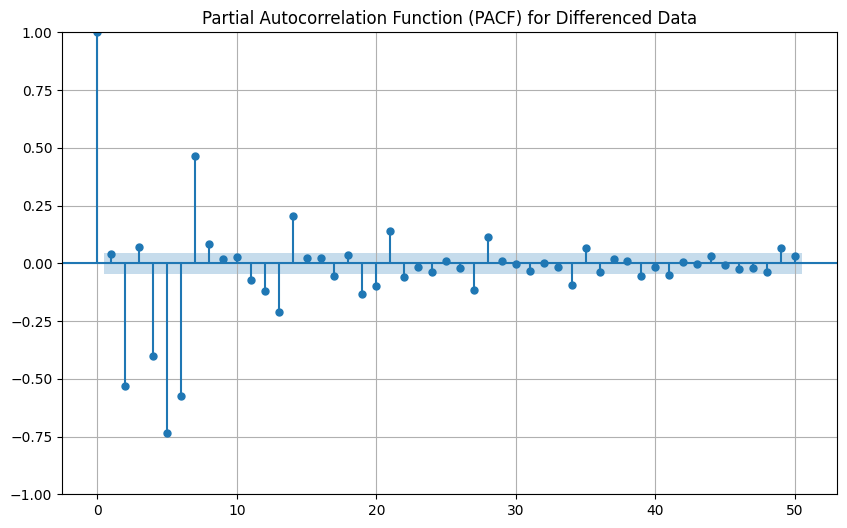

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Drop NaN values from the seasonal differenced data
seasonal_diff_data = data['Seasonal_Difference'].dropna()

# Plot the ACF
plt.figure(figsize=(10, 6))
plot_acf(seasonal_diff_data, lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Differenced Data')
plt.grid()
plt.show()

# Plot the PACF
plt.figure(figsize=(10, 6))
plot_pacf(seasonal_diff_data, lags=50, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF) for Differenced Data')
plt.grid()
plt.show()


In [50]:
data.index = pd.to_datetime(data.index)  # Ensure datetime format
data = data.asfreq('D')  # Explicitly set daily frequency

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
model = SARIMAX(
    data['Unique.Visits'], 
    order=(2, 0, 2),       
    seasonal_order=(1, 1, 1, 7), 
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit(disp=False)

# Print model summary
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                       Unique.Visits   No. Observations:                 2167
Model:             SARIMAX(2, 0, 2)x(1, 1, [1], 7)   Log Likelihood              -14660.142
Date:                             Thu, 21 Nov 2024   AIC                          29334.284
Time:                                     18:05:44   BIC                          29373.997
Sample:                                 09-14-2014   HQIC                         29348.812
                                      - 08-19-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2727      0.089     14.246      0.000       1.098       1.448
ar.L2         -0.3047      

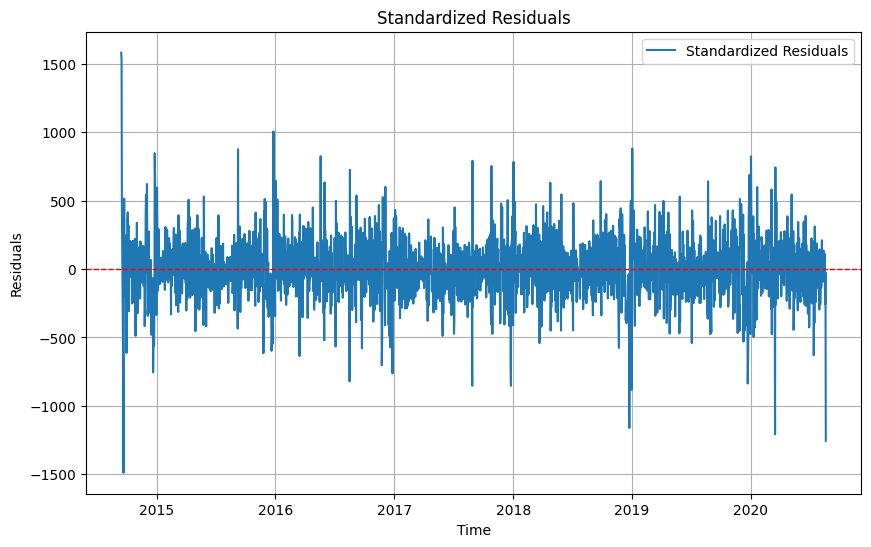

In [41]:
# Standardized residuals
plt.figure(figsize=(10, 6))
plt.plot(results.resid, label='Standardized Residuals')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Standardized Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.legend()
plt.grid()
plt.show()


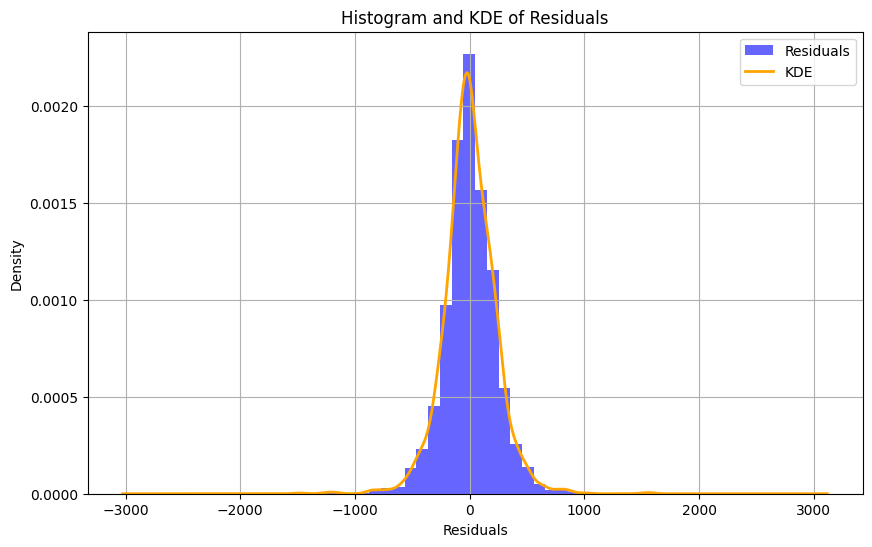

In [42]:
# Histogram plus KDE for residuals
plt.figure(figsize=(10, 6))
plt.hist(results.resid, bins=30, density=True, alpha=0.6, color='blue', label='Residuals')
results.resid.plot(kind='kde', color='orange', label='KDE', linewidth=2)
plt.title('Histogram and KDE of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


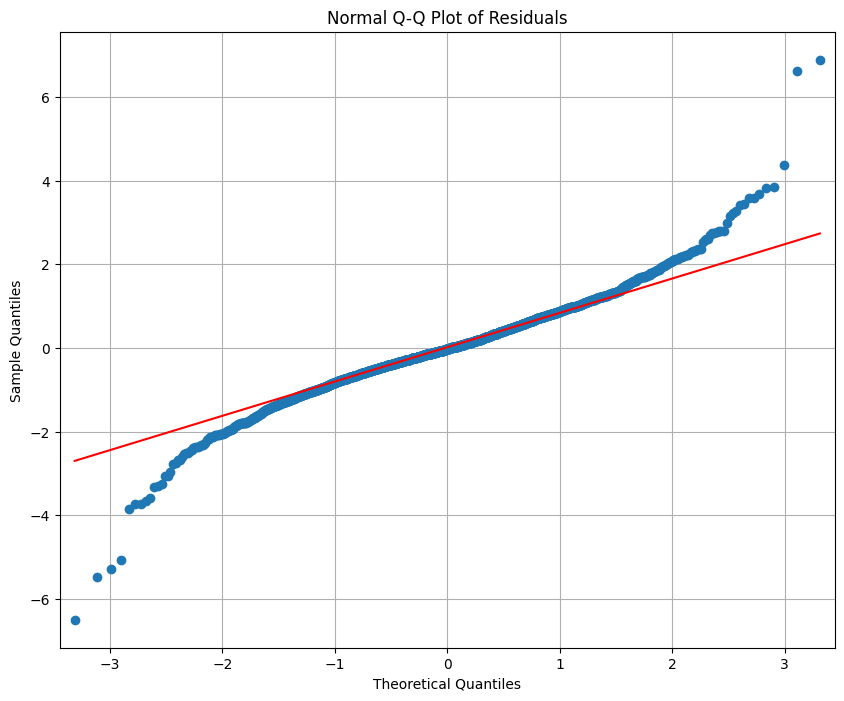

In [43]:
import statsmodels.api as sm

plt.figure(figsize=(10, 8))
sm.qqplot(results.resid, line='q', fit=True, ax=plt.gca())
plt.title('Normal Q-Q Plot of Residuals')
plt.grid()
plt.show()


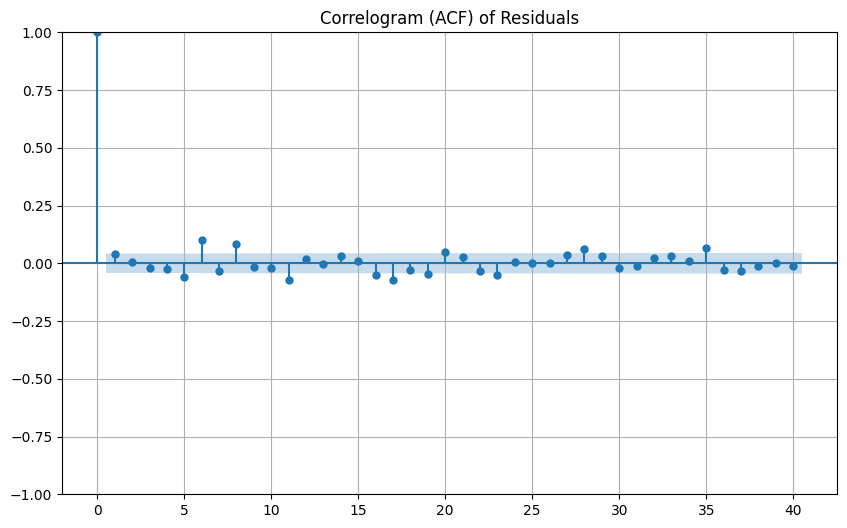

In [44]:
# Correlogram (ACF of residuals)
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(10, 6))
plot_acf(results.resid, lags=40, ax=plt.gca())
plt.title('Correlogram (ACF) of Residuals')
plt.grid()
plt.show()

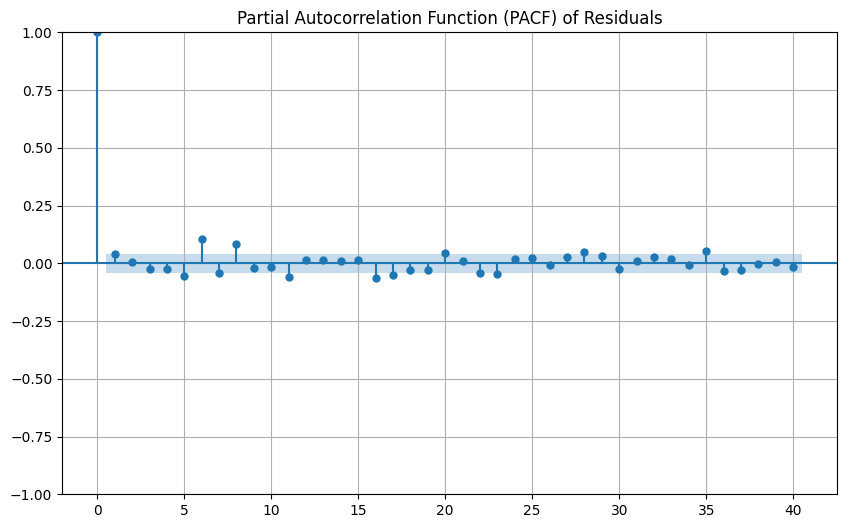

In [45]:
# PACF plot for SARIMA residuals
plt.figure(figsize=(10, 6))
plot_pacf(results.resid, lags=40, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation Function (PACF) of Residuals')
plt.grid()
plt.show()


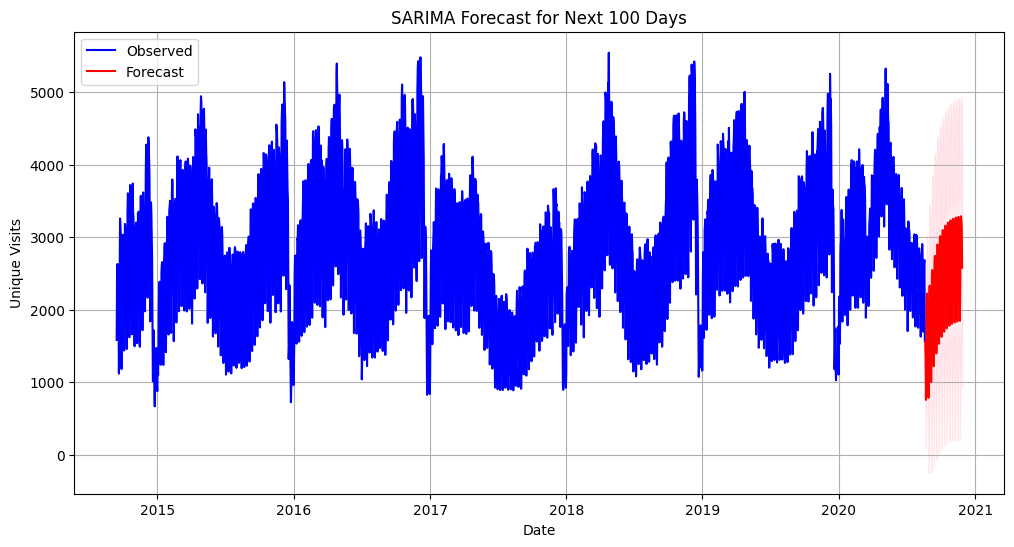

In [46]:
# Forecast for the next 100 days
forecast_steps = 100

forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='D')[1:]  # Skip start date
forecast_values = forecast.predicted_mean

# Plot the 100-day forecast
plt.figure(figsize=(12, 6))
plt.plot(data['Unique.Visits'], label='Observed', color='blue')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(
    forecast_index,
    forecast.conf_int().iloc[:, 0],
    forecast.conf_int().iloc[:, 1],
    color='pink',
    alpha=0.3
)
plt.title('SARIMA Forecast for Next 100 Days')
plt.xlabel('Date')
plt.ylabel('Unique Visits')
plt.legend(loc='best')
plt.grid()
plt.show()
